In [1]:
 %%javascript
    MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });

<IPython.core.display.Javascript object>

## QCD InfraRed Extension Code

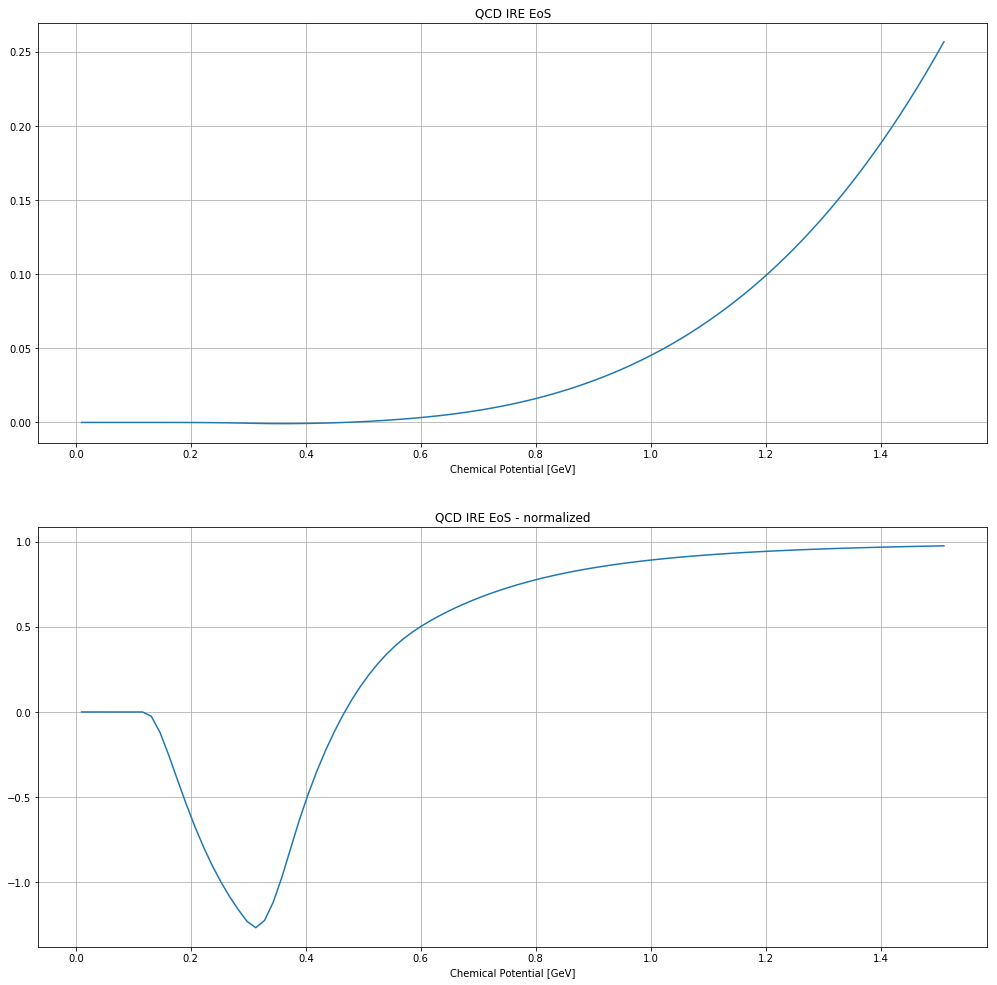

In [16]:
%matplotlib inline

import math
import cmath
import numpy as np
import scipy.integrate as integ
import matplotlib.pyplot as plt
import matplotlib as mpl
from decimal import *

#from scipy import integrate

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Nc = 3
Nf = 2

M3 = 196./1.0e3
m2 = 639./1.0e3
MPrime = 14./1.0e3

def _infunc(x,func,gfun,hfun,more_args):
    a = gfun(x)
    b = hfun(x)
    myargs = (x,) + more_args
    return integ.quad(func,a,b,args=myargs)[0]

def custom_dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-8, 
                   epsrel=1.49e-8, maxp1=50, limit=50):
    return integ.quad(_infunc, a, b, (func, gfun, hfun, args), 
                          epsabs=epsabs, epsrel=epsrel, maxp1=maxp1, limit=limit)

def Omega2(zeta, p, m2):
    return p**2. + (m2 + M3/(-zeta + p**2. + m2))**2.

def integrandTheta(theta, p, mu, mp):
    
    return 1./(2.*math.pi)**3.*(4.*math.pi)* p**2.* \
        (2.*Nc*Nf*(1./2./math.pi)*(2.)* \
             math.log(
                 abs(
                     (Omega2((1j*theta + mu)**2., p, mp) - (1j*theta + mu)**2.)/
                     (Omega2(-theta**2., p,  mp) + theta**2.)                      
                 )
             )
        )


def pressureZeroT(mu, mp):
    def lim_inf_theta(p):
        return 0.

    def lim_sup_theta(p):
        return np.inf

    #pressure_zero_t, err_dblquad = integ.dblquad(integrandTheta, 0, mu, lim_inf_theta, lim_sup_theta, args=(mu, mp))
    pressure_zero_t, err_dblquad = custom_dblquad(integrandTheta, 0., mu, lim_inf_theta, lim_sup_theta, args=(mu, mp), maxp1=100, limit=100)
    return pressure_zero_t
    
    

# Cálculo da pressão desde mu=0.01GeV até mu=1.5GeV    
mu_range = np.linspace(0.01, 1.51, 100)

pressure_zero_T_list = []    
pressure_norm_zero_T_list = []    

for mu in mu_range:
    pressure = pressureZeroT(mu, MPrime)
    pressureNormalized = pressureZeroT(mu, MPrime)/(Nf*Nc*mu**4./12./math.pi**2.)
    
    pressure_zero_T_list.append(pressure)
    pressure_norm_zero_T_list.append(pressureNormalized)

#print pressure_zero_T_list

mpl.rcParams['figure.figsize'] = (17,17)

plt.figure()

plt.subplot(211)             # the first subplot in the first figure
plt.title('QCD IRE EoS')

plt.xlabel('Chemical Potential [GeV]')
#plt.ylabel('Pressure [GeV^4]')

plt.grid()
plt.plot(mu_range, pressure_zero_T_list)

# the second subplot in the first figure
plt.subplot(212)
plt.title('QCD IRE EoS - normalized')

plt.xlabel('Chemical Potential [GeV]')
#plt.ylabel('Pressure [GeV^4]')

plt.grid()
plt.plot(mu_range, pressure_norm_zero_T_list)

plt.show()

# Original results
 
![Pressure Mu](Pressure_Mu.png)

![Pressure Mu normalized](Pressure_Mu_normalized.png)